# Chapter 8 - Solutions

## Applied

**Q7**. In the lab, we applied random forests to the `Boston` data using `max_features = 6` and using `n_estimators = 25` and `n_estimators = 500`. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for `max_features` and `n_estimators`. Describe the results obtained.

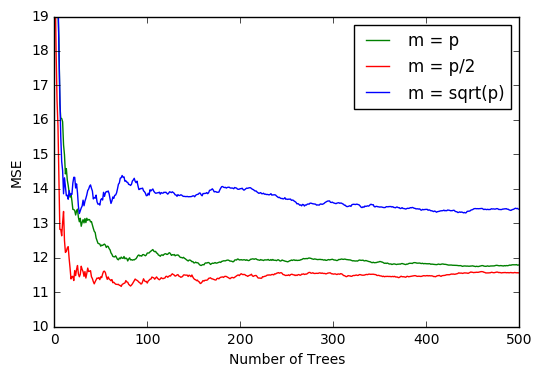

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

dataBoston = pd.read_csv('../../data/Boston.csv', index_col = 0)

train, test = train_test_split(dataBoston, test_size = 0.5, random_state = 1)

train_x = train.drop('medv', axis = 1)
test_x = test.drop('medv', axis = 1)
train_y = train['medv']
test_y = test['medv']

# We want to plot MSE versus the number of trees.  To do this in Python, we must construct a for loop
n_trees = 500

rf1 = RandomForestRegressor(warm_start = True)
boston1_mse = []
for i in range(1, n_trees + 1):
    rf1.set_params(n_estimators = i, max_features = "auto", random_state = 1)
    rf1.fit(train_x, train_y)
    boston1_mse.append(mean_squared_error(test_y, rf1.predict(test_x)))
    
rf2 = RandomForestRegressor(warm_start = True)
boston2_mse = []
for i in range(1, n_trees + 1):
    rf2.set_params(n_estimators = i, max_features = 0.5, random_state = 1)
    rf2.fit(train_x, train_y)
    boston2_mse.append(mean_squared_error(test_y, rf2.predict(test_x)))

rf3 = RandomForestRegressor(warm_start = True)
boston3_mse = []
for i in range(1, n_trees + 1):
    rf3.set_params(n_estimators = i, max_features = "sqrt", random_state = 1)
    rf3.fit(train_x, train_y)
    boston3_mse.append(mean_squared_error(test_y, rf3.predict(test_x)))
    
plt.plot(boston1_mse, 'g', label = 'm = p')
plt.plot(boston2_mse, 'r', label = 'm = p/2')
plt.plot(boston3_mse, 'b', label = 'm = sqrt(p)')
plt.ylim(10, 19)
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

We may see that the Test MSE is very high for a single tree, it decreases as the number of trees increases. Also, the test MSE is the lowest for using half the predictors, rather than all and the square root.

**Q8.** In the lab, a classification tree was applied to the `Carseats` data set after converting `Sales` into a qualitative response variable. Now we will seek to predict `Sales` using regression trees and related approaches, treating the response as a quantitative variable.

a) Split the data set into a training set and a test set.

First import the data and take a look at the data types.

In [3]:
dataCarseats = pd.read_csv('../../data/Carseats.csv', index_col = 0)
dataCarseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

The `object` types will need to be converted to dummy variables before splitting into test and training sets.

In [5]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
dataCarseats.ShelveLoc = enc.fit_transform(dataCarseats.ShelveLoc)
dataCarseats.Urban = enc.fit_transform(dataCarseats.Urban)
dataCarseats.US = enc.fit_transform(dataCarseats.US)

train, test = train_test_split(dataCarseats, test_size = 0.5, random_state = 1)

train_x = train.drop('Sales', axis = 1)
test_x = test.drop('Sales', axis = 1)
train_y = train['Sales']
test_y = test['Sales']

b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test error rate do you obtain ?

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree_carseats = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5)
tree_carseats.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

And examine some of the outputs

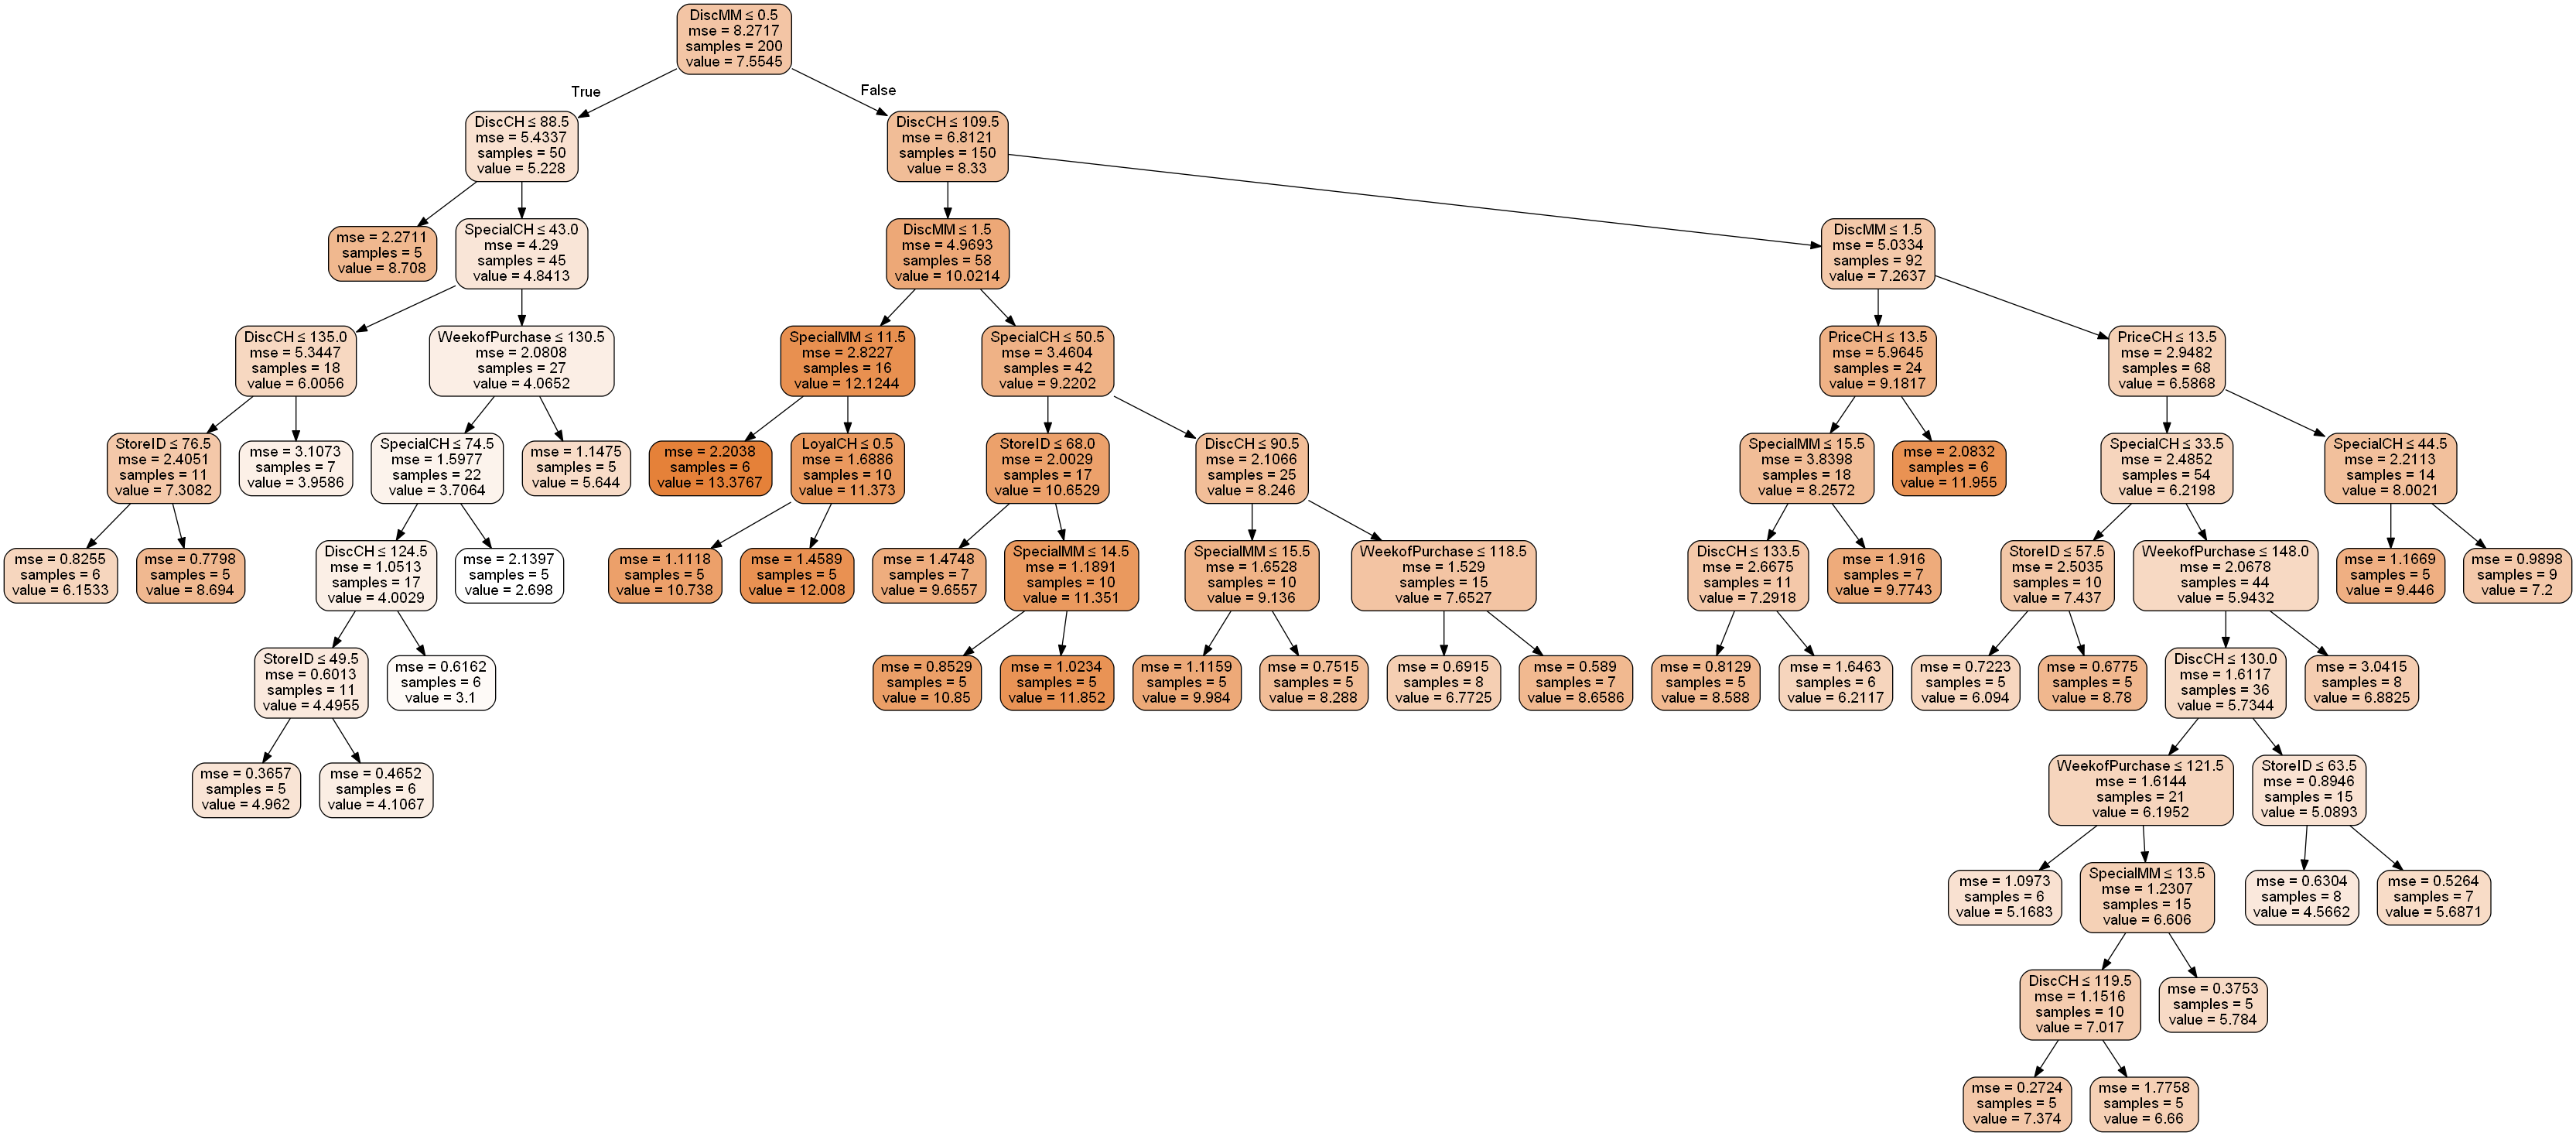

In [40]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(tree_carseats, out_file=None, 
                         feature_names=train_x.columns,  
                         class_names=train_y,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [8]:
mean_squared_error(test_y, tree_carseats.predict(test_x))

3.9242846104365081

We may conclude that the Test MSE is about 3.9

c) Use the bagging approach in order to analyze this data. What test error rate do you obtain ? Examine the `feature_importances_` attribute to determine which variables are most important.

In [9]:
from sklearn.ensemble import RandomForestRegressor

bag_carseats = RandomForestRegressor(n_estimators = 500, max_features = 10, random_state = 1)
bag_carseats.fit(train_x, train_y)
mean_squared_error(test_y, bag_carseats.predict(test_x))

2.799726624109999

In [11]:
pd.DataFrame({'feature': train_x.columns,
              'score': bag_carseats.feature_importances_
             }).sort_values('score', ascending = False)

,feature,score
5,ShelveLoc,0.314754
4,Price,0.293607
6,Age,0.094432
0,CompPrice,0.091198
2,Advertising,0.071946
1,Income,0.054952
3,Population,0.041506
7,Education,0.027265
8,Urban,0.006358
9,US,0.003981


We may conclude that `ShelveLoc` and `Price` are the two most important variables.

d) Use random forests to analyze this data. What test error rate do you obtain ? Examine the `feature_importances_` attribute to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [14]:
rf_carseats = RandomForestRegressor(n_estimators = 500, max_features = "sqrt", random_state = 1)
rf_carseats.fit(train_x, train_y)
mean_squared_error(test_y, rf_carseats.predict(test_x))

3.1767938539360041

In this case, with $m = \sqrt{p}$, we have a Test MSE of 3.18

In [15]:
pd.DataFrame({'feature': train_x.columns,
              'score': rf_carseats.feature_importances_
             }).sort_values('score', ascending = False)

,feature,score
4,Price,0.245454
5,ShelveLoc,0.211106
6,Age,0.117462
0,CompPrice,0.098212
2,Advertising,0.091325
1,Income,0.086972
3,Population,0.075877
7,Education,0.050613
9,US,0.011700
8,Urban,0.011279


We may conclude that, in this case also, “Price” and “ShelveLoc” are the two most important variables.

**Q9.** This problem involves the “OJ” data set which is part of the “ISLR” package.

a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

dataOJ = pd.read_csv('../../data/OJ.csv', index_col = 0)
dataOJ.dtypes

Purchase           object
WeekofPurchase      int64
StoreID             int64
PriceCH           float64
PriceMM           float64
DiscCH            float64
DiscMM            float64
SpecialCH           int64
SpecialMM           int64
LoyalCH           float64
SalePriceMM       float64
SalePriceCH       float64
PriceDiff         float64
Store7             object
PctDiscMM         float64
PctDiscCH         float64
ListPriceDiff     float64
STORE               int64
dtype: object

In [44]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
dataOJ.Store7 = enc.fit_transform(dataOJ.Store7)

train, test = train_test_split(dataOJ, test_size = 1070 - 800, random_state = 1)

b) Fit a tree to the training data, with `Purchase` as the response and the other variables except for `Buy` as predictors.  What is the training error rate?

In [45]:
from sklearn.tree import DecisionTreeClassifier

train_x = train.drop('Purchase', axis = 1)
test_x = test.drop('Purchase', axis = 1)
train_y = train['Purchase']
test_y = test['Purchase']

OJ_tree = DecisionTreeClassifier(min_samples_split = 10, min_samples_leaf = 5)
OJ_tree.fit(train_x, train_y)

1 - OJ_tree.score(train_x, train_y)

0.10375000000000001

c) Create a plot of the tree, and interpret the results.

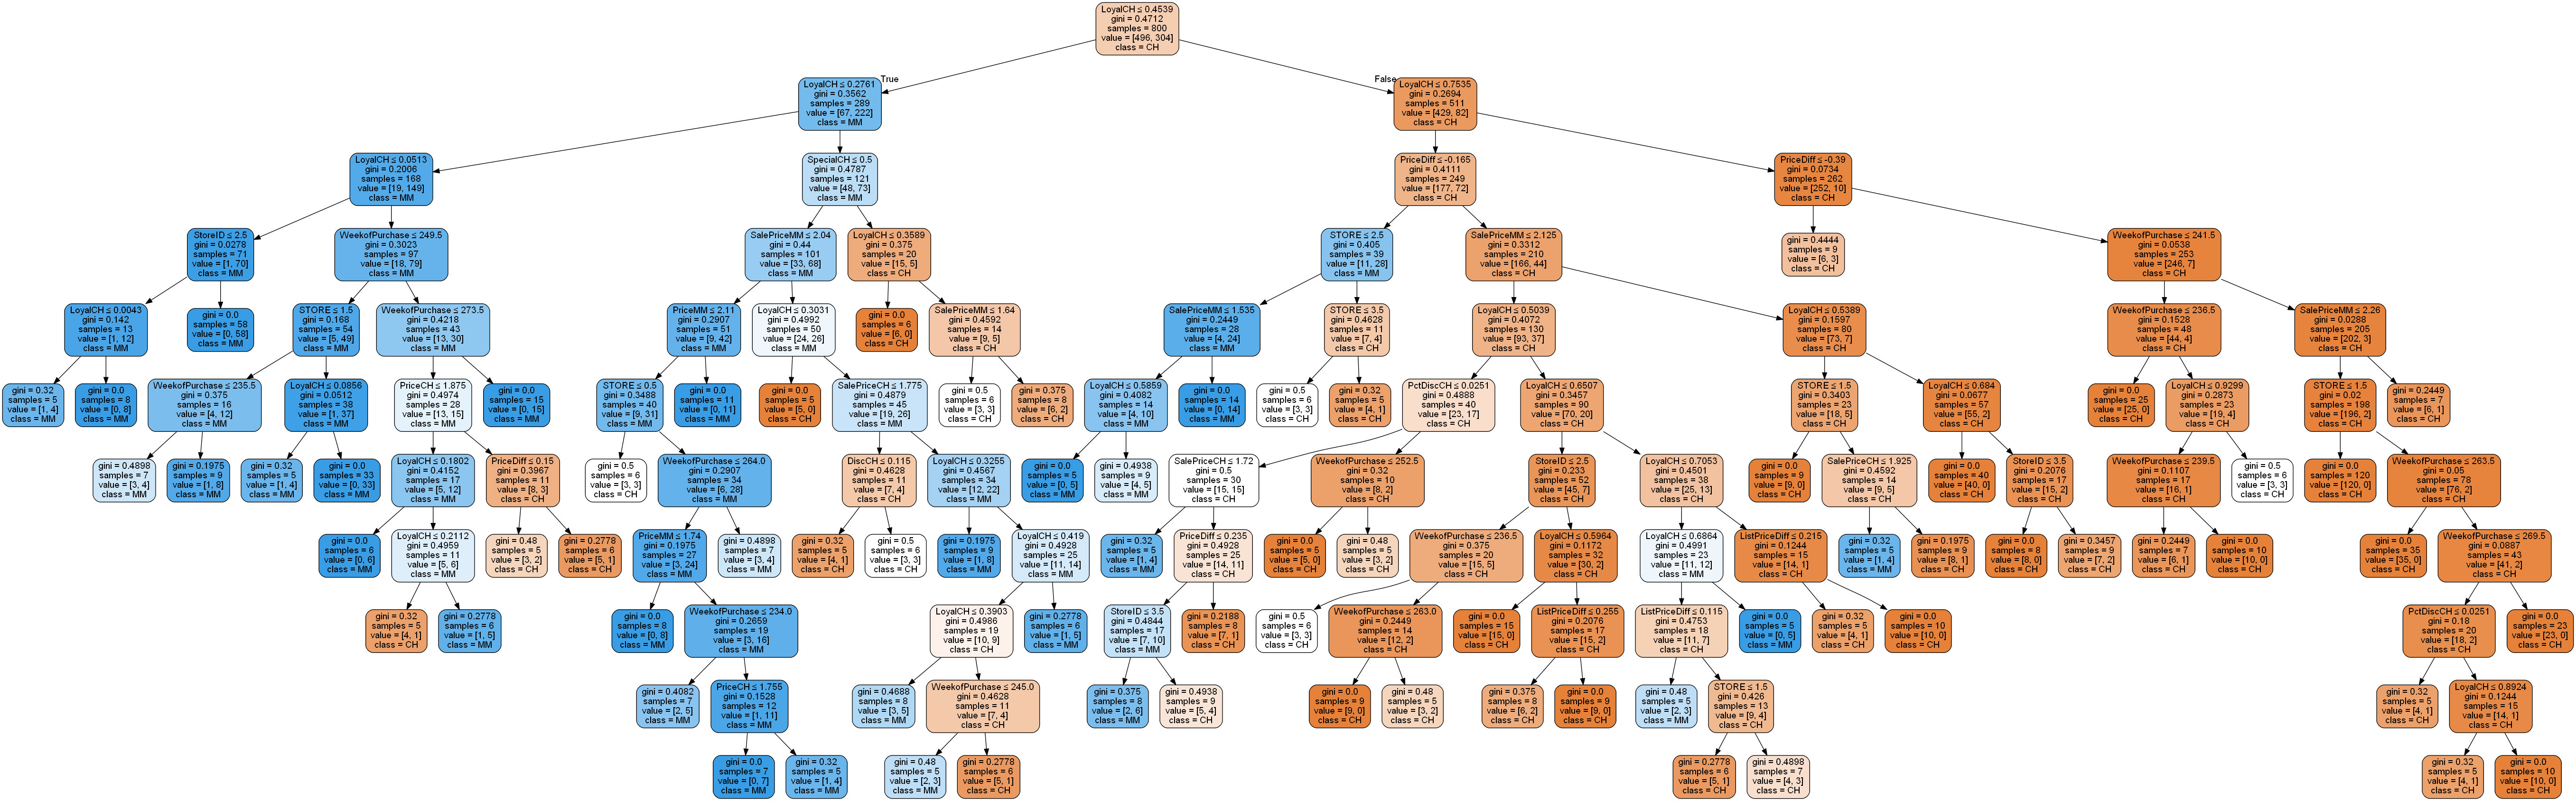

In [52]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(OJ_tree, out_file=None, 
                                feature_names=train_x.columns,
                                class_names = OJ_tree.classes_,
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

We may see that the most important indicator of `Purchase` appears to be `LoyalCH`, since the first branch differentiates the intensity of customer brand loyalty to CH.

e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, OJ_tree.predict(test_x))

array([[141,  16],
       [ 35,  78]])

In [64]:
1 - (141 + 78)/(141 + 16 + 35 + 78)

0.18888888888888888

Or

In [66]:
1 - OJ_tree.score(test_x, test_y)

0.18888888888888888

We may conclude that the test error rate is about 19%.

**Q10.** We now use boosting to predict “Salary” in the “Hitters” data set.

a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [67]:
import pandas as pd
import numpy as np

dataHitters = pd.read_csv('../../data/Hitters.csv', index_col = 0)
dataHitters = dataHitters.dropna()
dataHitters['Salary'] = np.log(dataHitters['Salary'])

dataHitters.dtypes

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

In [69]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
dataHitters.League = enc.fit_transform(dataHitters.League)
dataHitters.Division = enc.fit_transform(dataHitters.Division)
dataHitters.NewLeague = enc.fit_transform(dataHitters.NewLeague)

b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [70]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataHitters, test_size = 63, random_state = 1)

train_x = train.drop('Salary', axis = 1)
test_x = test.drop('Salary', axis = 1)
train_y = train['Salary']
test_y = test['Salary']

c) Perform boosting on the training set with 1000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

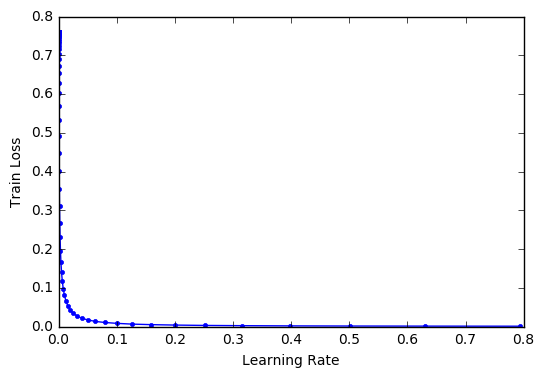

In [71]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

lamdas = 10 ** np.arange(-10, 0, 0.1)

train_err = []
for i in lamdas:
    gbr_hitters = GradientBoostingRegressor(n_estimators = 1000,
                                            learning_rate = i,
                                            random_state = 0)
    gbr_hitters.fit(train_x, train_y)
    train_err.append(np.mean(gbr_hitters.train_score_))
    
plt.plot(lamdas, train_err, '.-b')
plt.ylabel("Train Loss")
plt.xlabel("Learning Rate")
plt.show()

d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

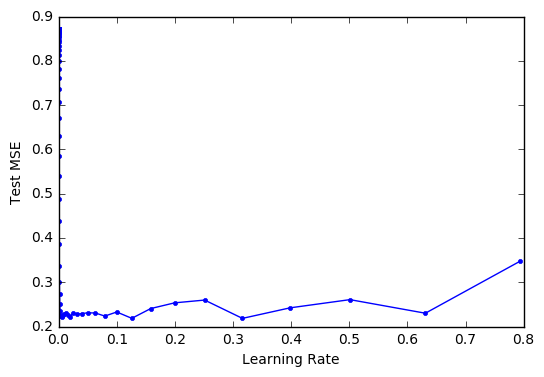

In [72]:
test_err = []
for i in lamdas:
    gbr_hitters = GradientBoostingRegressor(n_estimators = 1000,
                                            learning_rate = i,
                                            random_state = 0)
    gbr_hitters.fit(train_x, train_y)
    test_err.append(mean_squared_error(test_y, gbr_hitters.predict(test_x)))
    
plt.plot(lamdas, test_err, '.-b')
plt.ylabel("Test MSE")
plt.xlabel("Learning Rate")
plt.show()

In [74]:
min(test_err)

0.21834559308258902

In [75]:
lamdas[test_err.index(min(test_err))]

0.31622776601681335

The minimum test MSE is 0.22, and is obtained for λ = 0.32.

e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

In [76]:
from sklearn.linear_model import LinearRegression
lm_hitters = LinearRegression()
lm_hitters.fit(train_x, train_y)
mean_squared_error(test_y, lm_hitters.predict(test_x))

0.4526388884726612

In [77]:
from sklearn.linear_model import Ridge
rg_hitters = Ridge(alpha = 0)
rg_hitters.fit(train_x, train_y)
mean_squared_error(test_y, rg_hitters.predict(test_x))

0.45263888847266254

The test MSE for boosting is lower than for linear regression and ridge regression.

f) Which variables appear to be the most important predictors in the boosted model?

In [83]:
gbr_hitters = GradientBoostingRegressor(n_estimators = 1000,
                                        learning_rate = 0.32,
                                        random_state = 1)
gbr_hitters.fit(train_x, train_y)
hitters_imp = pd.DataFrame({'feature':  train_x.columns
                            , 'score': gbr_hitters.feature_importances_
                            }).sort_values('score')
hitters_imp.sort_values('score', ascending = False)

,feature,score
12,CWalks,0.021114
16,Assists,0.020463
10,CRuns,0.020145
4,RBI,0.018903
1,Hits,0.016704
9,CHmRun,0.016004
5,Walks,0.015134
2,HmRun,0.014556
15,PutOuts,0.014508
11,CRBI,0.014281


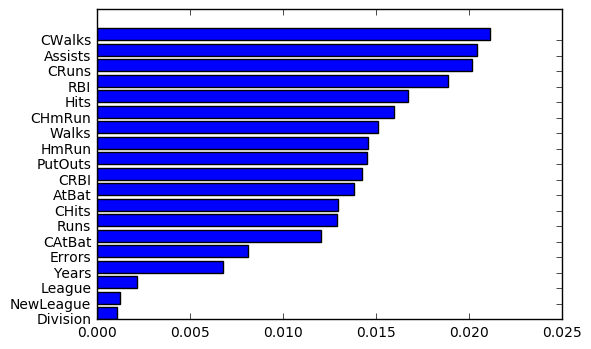

In [84]:
plt.barh(range(0, len(hitters_imp)), hitters_imp['score'],
        tick_label = hitters_imp['feature'])
plt.show()

We may see that “CWalks” is by the most important variable.

g) Now apply bagging to the training set. What is the test set MSE for this approach ?

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf_hitters = RandomForestRegressor(n_estimators = 500, random_state = 1)
rf_hitters.fit(train_x, train_y)
mean_squared_error(test_y, rf_hitters.predict(test_x))

0.25040223319537686

The test MSE for bagging is 0.25, which approximately the same as boosting depending on the choice of learning paramter.

**Q11.** This question uses the `Caravan` data set.

a) Create a training set consisting of the first 1000 observations, and a test set consisting of the remaining observations.

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

dataCaravan = pd.read_csv('../../data/Caravan.csv', index_col = 0)

enc = LabelEncoder()
dataCaravan.Purchase = enc.fit_transform(dataCaravan.Purchase)

train, test = train_test_split(dataCaravan, test_size = 4822, random_state = 0)

train_x = train.drop('Purchase', axis = 1)
test_x = test.drop('Purchase', axis = 1)
train_y = train['Purchase']
test_y = test['Purchase']

b) Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1000 trees, and a shrinkage value of 0.01. Which predictors appear to be most important?

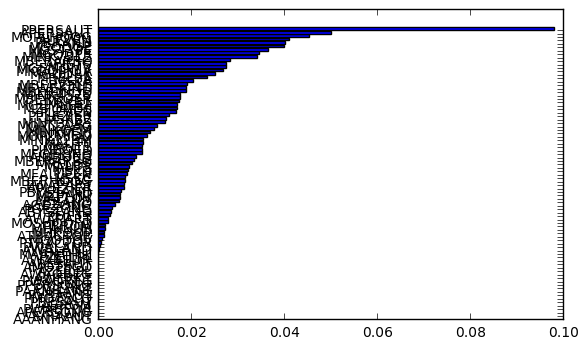

In [89]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

gbc_caravan = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.01,
                                  random_state = 0)
gbc_caravan.fit(train_x, train_y)

caravan_imp = pd.DataFrame({'feature':  train_x.columns
                            , 'score': gbc_caravan.feature_importances_
                            }).sort_values('score')

plt.barh(range(0, len(caravan_imp)), caravan_imp['score'],
        tick_label = caravan_imp['feature'])
plt.show()

In [90]:
caravan_imp.sort_values('score', ascending = False)

,feature,score
46,PPERSAUT,0.097996
67,APERSAUT,0.049910
15,MOPLHOOG,0.045332
75,ALEVEN,0.041003
58,PBRAND,0.040201
8,MGODGE,0.039927
0,MOSTYPE,0.036364
6,MGODPR,0.034431
39,MINK7512,0.034118
23,MBERARBO,0.028387


The variables “PPERSAUT” and “APERSAUT” are the two most important variables.

Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20%. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [91]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

pred = []
for prob in gbc_caravan.predict_proba(test_x)[:, 1]:
    if(prob >= 0.2):
        pred.append(1)
    else:
        pred.append(0)

confusion_matrix(test_y, pred)

array([[4327,  205],
       [ 246,   44]])

In [92]:
44 / (205 + 44)

0.17670682730923695

For boosting, the fraction of people predicted to make a purchase that in fact make one is 0.18.

In [93]:
lgr_caravan = LogisticRegression()
lgr_caravan.fit(train_x, train_y)

pred = []
for prob in lgr_caravan.predict_proba(test_x)[:, 1]:
    if(prob >= 0.2):
        pred.append(1)
    else:
        pred.append(0)
        
confusion_matrix(test_y, pred)

array([[4230,  302],
       [ 235,   55]])

In [94]:
55 / (302 + 55)

0.15406162464985995

For logistic regression, the fraction of people predicted to make a purchase that in fact make one is 0.15.

**Q12** Apply boosting, bagging, and random forests to a data set of your choice. Be sure to fit models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?

We will use the `Weekly` data set and predict the `Direction` variable.

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

dataWeekly = pd.read_csv('../../data/Weekly.csv', index_col = 0)
dataWeekly = dataWeekly.drop(['Year', 'Today'], axis = 1)

enc = LabelEncoder()
dataWeekly.Direction = enc.fit_transform(dataWeekly.Direction)

train, test = train_test_split(dataWeekly, test_size = 0.5, random_state = 1)

train_x = train.drop('Direction', axis = 1)
test_x = test.drop('Direction', axis = 1)
train_y = train['Direction']
test_y = test['Direction']

We begin with logistic regression.

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lgr_weekly = LogisticRegression()
lgr_weekly.fit(train_x, train_y)

pred = lgr_weekly.predict(test_x)

confusion_matrix(test_y, pred)

array([[  2, 250],
       [  1, 292]])

In [97]:
lgr_weekly.score(test_x, test_y)

0.5394495412844037

We have an accuracy of 0.54.  We continue with boosting.

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_weekly = GradientBoostingClassifier(n_estimators = 5000, random_state = 0)
gbc_weekly.fit(train_x, train_y)

pred = gbc_weekly.predict(test_x)

confusion_matrix(test_y, pred)

array([[112, 140],
       [108, 185]])

In [99]:
gbc_weekly.score(test_x, test_y)

0.54495412844036695

We have an accuracy of 0.54. We continue with bagging.

In [120]:
from sklearn.ensemble import RandomForestClassifier

bag_weekly = RandomForestClassifier(n_estimators = 500, max_features = 6,
                                    random_state = 1)
bag_weekly.fit(train_x, train_y)

pred = bag_weekly.predict(test_x)

confusion_matrix(test_y, pred)

array([[ 76, 176],
       [ 88, 205]])

In [121]:
bag_weekly.score(test_x, test_y)

0.51559633027522933

We have an accuracy of 0.51. We finish with random forests.

In [124]:
rf_weekly = RandomForestClassifier(n_estimators = 500, max_features = "auto",
                                    random_state = 1)
rf_weekly.fit(train_x, train_y)

pred = rf_weekly.predict(test_x)

confusion_matrix(test_y, pred)

array([[ 78, 174],
       [ 78, 215]])

In [125]:
rf_weekly.score(test_x, test_y)

0.53761467889908254

We have an accuracy of 0.54.  Out of all tests, boosting produced the best results.